**DATASET FIFA 24**

**1. Import Google Drive**

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Import Libraries**

In [25]:
import pandas as pd

In [26]:
# Baca file .csv
file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/player_stats.csv'
data = pd.read_csv(file_path, encoding='latin1')
print(data)

                        player   country  height  weight  age  \
0     Cristian Castro Devenish  Colombia     192      84   22   
1             Silaldo Taffarel    Brazil     181      80   31   
2                Thomas DÃ¤hne   Germany     193      84   29   
3            Michael Sollbauer   Austria     187      86   33   
4                Diego Segovia   Uruguay     191      80   23   
...                        ...       ...     ...     ...  ...   
5677             Mohamed Salah     Egypt     175      71   31   
5678                Sadio Mané   Senegal     174      69   31   
5679                 Neymar Jr    Brazil     175      68   31   
5680         Cristiano Ronaldo  Portugal     187      83   38   
5681        Zlatan Ibrahimovi?    Sweden     195     102   41   

                   club  ball_control  dribbling  marking  slide_tackle  ...  \
0        Atl. Nacional             55         43      NaN            68  ...   
1          Corinthians             69         70      NaN  

3. **Menampilkan struktur variable data FIFA24**

In [27]:
print("Struktur Data Football Player:")
print(data.info())

Struktur Data Football Player:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          5682 non-null   object 
 1   country         5682 non-null   object 
 2   height          5682 non-null   int64  
 3   weight          5682 non-null   int64  
 4   age             5682 non-null   int64  
 5   club            5682 non-null   object 
 6   ball_control    5682 non-null   int64  
 7   dribbling       5682 non-null   int64  
 8   marking         0 non-null      float64
 9   slide_tackle    5682 non-null   int64  
 10  stand_tackle    5682 non-null   int64  
 11  aggression      5682 non-null   int64  
 12  reactions       5682 non-null   int64  
 13  att_position    5682 non-null   int64  
 14  interceptions   5682 non-null   int64  
 15  vision          5682 non-null   int64  
 16  composure       5682 non-null   int64  
 17  cr

In [28]:
# Tampilkan nama kolom dan tipe data kolom
column_types = data.dtypes
print(column_types)

player             object
country            object
height              int64
weight              int64
age                 int64
club               object
ball_control        int64
dribbling           int64
marking           float64
slide_tackle        int64
stand_tackle        int64
aggression          int64
reactions           int64
att_position        int64
interceptions       int64
vision              int64
composure           int64
crossing            int64
short_pass          int64
long_pass           int64
acceleration        int64
stamina             int64
strength            int64
balance             int64
sprint_speed        int64
agility             int64
jumping             int64
heading             int64
shot_power          int64
finishing           int64
long_shots          int64
curve               int64
fk_acc              int64
penalties           int64
volleys             int64
gk_positioning      int64
gk_diving           int64
gk_handling         int64
gk_kicking  

**4. Data Cleansing-Standarisasi kolom Player**

Algoritma yang akan digunakan:

1.   Cek apakah nama player memiliki spasi yang berlebih atau karakter yang abstract.
2.   Cek jika menggunakan tanda baca dan angka




In [29]:
import pandas as pd
import re

# Baca file CSV (kalau datamu CSV)
file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/player_stats.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Fungsi untuk membersihkan nama pemain
def clean_player_name(name):
    if pd.isna(name):
        return name
    # Hilangkan tanda baca dan angka
    cleaned = re.sub(r'[^a-zA-Z\s]', '', str(name))  # hanya huruf & spasi
    # Hilangkan spasi berlebihan
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned

# Terapkan ke kolom 'Player' (ganti sesuai nama kolom kamu)
df['Player_Clean'] = df['player'].apply(clean_player_name)

# Lihat hasil
print(df[['player', 'Player_Clean']].head(10))


                     player              Player_Clean
0  Cristian Castro Devenish  Cristian Castro Devenish
1          Silaldo Taffarel          Silaldo Taffarel
2             Thomas DÃ¤hne               Thomas Dhne
3         Michael Sollbauer         Michael Sollbauer
4             Diego Segovia             Diego Segovia
5            ClÃ¡udio Ramos              Cludio Ramos
6           CÃ©dric Zesiger             Cdric Zesiger
7               Pedro Gomes               Pedro Gomes
8          Famara DiÃ©dhiou            Famara Didhiou
9              Sibiry Keita              Sibiry Keita


Kolom player yang menggunakan tanda baca telah diperbaiki

**5. Data Cleansing-Standarisasi kolom Country**

Algoritma yang digunakan:


1.   Membuang nama negara yang mempunyai spasi depan dan belakang
2.   Mengubah semua menjadi kapital
3. Merapikan jika ada spasi berlebih



In [30]:
import pandas as pd
import re

# Baca CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/player_stats.csv'
df = pd.read_csv(file_path, encoding='latin1')

def clean_country(country):
    if pd.isna(country):
        return country
    cleaned = str(country).strip()       # buang spasi depan belakang
    cleaned = re.sub(r'\s+', ' ', cleaned)  # rapikan spasi ganda
    return cleaned.title()               # ubah semua huruf ke kapital

df['Country_Clean'] = df['country'].apply(clean_country)

# Cek hasil
print(df[['country', 'Country_Clean']].head(10))

       country Country_Clean
0     Colombia      Colombia
1       Brazil        Brazil
2      Germany       Germany
3      Austria       Austria
4      Uruguay       Uruguay
5     Portugal      Portugal
6  Switzerland   Switzerland
7     Portugal      Portugal
8      Senegal       Senegal
9         Mali          Mali


**6. Data Cleansing-Standarisasi kolom Age**

Algoritma yang digunakan:


1.   Jika ada menggunakan romawi akan diubah menjadi format integer biasa
2.   Jika ada umur yang dibawah 10, maka 0 akan dihapus menjadi default, contoh: 5



In [31]:
import pandas as pd
import re

# Baca CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/player_stats.csv'
df = pd.read_csv(file_path, encoding='latin1')

# ====== Fungsi konversi angka Romawi ke integer ======
roman_map = {
    'M':1000, 'CM':900, 'D':500, 'CD':400,
    'C':100, 'XC':90, 'L':50, 'XL':40,
    'X':10, 'IX':9, 'V':5, 'IV':4, 'I':1
}

def roman_to_int(s):
    s = s.upper()
    i, num = 0, 0
    while i < len(s):
        if i+1<len(s) and s[i:i+2] in roman_map:
            num += roman_map[s[i:i+2]]
            i += 2
        else:
            num += roman_map.get(s[i],0)
            i += 1
    return num

# ====== Fungsi bersihin Age ======
def clean_age(age):
    if pd.isna(age):
        return np.nan
    s = str(age).strip()

    # Jika angka (contoh "05", "15")
    if s.isdigit():
        return int(s)   # otomatis hilangkan leading zero

    # Jika format Romawi
    if re.fullmatch(r'[IVXLCDM]+', s.upper()):
        return roman_to_int(s)

    # Kalau tidak sesuai, coba paksa ke integer
    try:
        return int(float(s))
    except:
        return np.nan

# Terapkan ke kolom Age
df['Age_Clean'] = df['age'].apply(clean_age)

# Cek hasil
print(df[['age', 'Age_Clean']].head(15))


    age  Age_Clean
0    22         22
1    31         31
2    29         29
3    33         33
4    23         23
5    31         31
6    25         25
7    20         20
8    30         30
9    22         22
10   23         23
11   31         31
12   21         21
13   29         29
14   19         19


Kolom age sudah di perbaiki

**7. Data Cleansing-Standarisasi kolom Value**

Algoritma yang digunakan:


1.   Dollar di konversi menjadi euro
2.   Menghapus tanda koma dan titik untuk ribuan



In [32]:
import pandas as pd
import re
import numpy as np

# Baca CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/player_stats.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Kurs konversi USD -> EUR
usd_to_eur = 0.95

# Fungsi membersihkan dan konversi Value
def clean_value(value):
    if pd.isna(value):
        return np.nan

    s = str(value).strip()
    s = s.replace('$', '').replace('USD', '').strip()

    # Hapus tanda koma dan titik ribuan
    s = s.replace(',', '').replace('.', '')

    try:
        val_usd = float(s)
        val_eur = val_usd * usd_to_eur
        return "€{:,.0f}".format(val_eur)
    except:
        return np.nan

df['Value_EUR'] = df['value'].apply(clean_value)

# Lihat 10 baris pertama
print(df[['value', 'Value_EUR']].head(10))


        value   Value_EUR
0  $1.400.000  €1,330,000
1    $975.00      €92,625
2  $1.100.000  €1,045,000
3    $650.00      €61,750
4    $300.00      €28,500
5  $2.800.000  €2,660,000
6  $1.600.000  €1,520,000
7    $230.00      €21,850
8  $1.400.000  €1,330,000
9    $475.00      €45,125


Kolom value telah diperbaiki

In [33]:
# Hapus duplikat (tetap simpan baris pertama yang muncul)
df_deduplicated = df.drop_duplicates(
    subset=['player', 'country', 'age', 'value'],
    keep='first'
).reset_index(drop=True)

# Tampilkan hasil
df_deduplicated.head()


,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value,Value_EUR
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,34,41,33,10,11,6,7,9,$1.400.000,"€1,330,000"
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,62,48,46,12,15,14,8,14,$975.00,"€92,625"
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,15,26,16,64,74,65,68,74,$1.100.000,"€1,045,000"
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,13,22,19,10,10,8,14,9,$650.00,"€61,750"
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,10,16,5,61,59,62,64,64,$300.00,"€28,500"


**8. Data Cleansing-Deduplikasi Data**

Menampilkan data yang sama dalam kolom Player, Country, Age, Value

In [34]:
duplicate_rows = df[df.duplicated(['player', 'country', 'age','value'], keep=False)]

# Display the duplicate rows
duplicate_rows

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value,Value_EUR
154,Maxime CrÃ©peau,Canada,180,88,29,LAFC,45,19,NaN,17,...,14,23,19,70,72,70,70,75,$2.200.000,"€2,090,000"
156,Stefan Thesker,Germany,190,84,32,Holstein Kiel,55,45,NaN,64,...,31,42,40,14,13,7,10,12,$700.00,"€66,500"
157,Cameron John,England,181,78,24,Rochdale,55,53,NaN,57,...,25,32,28,8,13,9,7,8,$350.00,"€33,250"
158,Maxime CrÃ©peau,Canada,180,88,29,LAFC,45,19,NaN,17,...,14,23,19,70,72,70,70,75,$2.200.000,"€2,090,000"
159,Stefan Thesker,Germany,190,84,32,Holstein Kiel,55,45,NaN,64,...,31,42,40,14,13,7,10,12,$700.00,"€66,500"
160,Cameron John,England,181,78,24,Rochdale,55,53,NaN,57,...,25,32,28,8,13,9,7,8,$350.00,"€33,250"


Menghapus data duplikat

In [35]:
# Hapus duplikat (tetap simpan baris pertama yang muncul)
df_deduplicated = df.drop_duplicates(
    subset=['player', 'country', 'age', 'value'],
    keep='first'
).reset_index(drop=True)

# Tampilkan hasil
df_deduplicated.head()

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value,Value_EUR
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,34,41,33,10,11,6,7,9,$1.400.000,"€1,330,000"
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,62,48,46,12,15,14,8,14,$975.00,"€92,625"
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,15,26,16,64,74,65,68,74,$1.100.000,"€1,045,000"
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,13,22,19,10,10,8,14,9,$650.00,"€61,750"
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,10,16,5,61,59,62,64,64,$300.00,"€28,500"


In [36]:
# Simpan DataFrame yang sudah dibersihkan ke file CSV baru di Google Drive
output_file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/player_stats_cleaned.csv'
df_deduplicated.to_csv(output_file_path, index=False, encoding='utf-8')

print(f"Data yang sudah dibersihkan berhasil disimpan ke: {output_file_path}")

Data yang sudah dibersihkan berhasil disimpan ke: /content/drive/MyDrive/Colab Notebooks/Dataset/player_stats_cleaned.csv


In [37]:
import pandas as pd

# Baca file CSV
file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/player_stats.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Hapus duplikat (tetap simpan baris pertama yang muncul)
df_deduplicated = df.drop_duplicates(
    subset=['player', 'country', 'age', 'value'],
    keep='first'
).reset_index(drop=True)

# Tampilkan hasil
display(df_deduplicated.head())

# Simpan DataFrame yang sudah dibersihkan ke file CSV baru di Google Drive
output_file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/player_stats_cleaned.csv'
df_deduplicated.to_csv(output_file_path, index=False, encoding='utf-8')

print(f"Data yang sudah dibersihkan berhasil disimpan ke: {output_file_path}")

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00


Data yang sudah dibersihkan berhasil disimpan ke: /content/drive/MyDrive/Colab Notebooks/Dataset/player_stats_cleaned.csv


In [38]:
# Hapus duplikat (tetap simpan baris pertama yang muncul)
df_deduplicated = df.drop_duplicates(
    subset=['player', 'country', 'age', 'value'],
    keep='first'
).reset_index(drop=True)

# Tampilkan hasil
display(df_deduplicated.head())

# Simpan DataFrame yang sudah dibersihkan ke file CSV baru di Google Drive
output_file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/player_stats_cleaned.csv'
df_deduplicated.to_csv(output_file_path, index=False, encoding='utf-8')

print(f"Data yang sudah dibersihkan berhasil disimpan ke: {output_file_path}")

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00


Data yang sudah dibersihkan berhasil disimpan ke: /content/drive/MyDrive/Colab Notebooks/Dataset/player_stats_cleaned.csv


---- Data Visualization ----




1. Import Library

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

2. Menambahkan Kolom value_category

In [40]:
import pandas as pd

# Baca dataset FIFA 24
file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/player_stats_cleaned.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Cek ukuran dan isi awal
print('Ukuran dataset: %d baris dan %d kolom\n' % df.shape)
print('Lima data teratas:')
print(df.head())

# Fungsi ubah value (mendukung € dan $)
def convert_value(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace('$', '').replace('M', 'e6').replace('K', 'e3')
        try:
            return eval(value)
        except:
            return None
    return value

# Konversi kolom 'value' ke angka
if 'value' in df.columns:
    df['value_num'] = df['value'].apply(convert_value)

# Tambahkan kolom kategori nilai pemain
if 'value_num' in df.columns:
    bins = [0, 1e6, 10e6, 50e6, 100e6, 200e6, float('inf')]
    labels = ['<1M', '1M-10M', '10M-50M', '50M-100M', '100M-200M', '>200M']
    df['value_category'] = pd.cut(df['value_num'], bins=bins, labels=labels)

print('\nUkuran dataset setelah penambahan kolom: %d baris dan %d kolom' % df.shape)
print('\nLima data teratas setelah diolah:')
print(df.head())


Ukuran dataset: 5679 baris dan 41 kolom

Lima data teratas:
                     player   country  height  weight  age            club  \
0  Cristian Castro Devenish  Colombia     192      84   22  Atl. Nacional    
1          Silaldo Taffarel    Brazil     181      80   31    Corinthians    
2           Thomas DÃÂ¤hne   Germany     193      84   29  Holstein Kiel    
3         Michael Sollbauer   Austria     187      86   33  SK Rapid Wien    
4             Diego Segovia   Uruguay     191      80   23  Independiente    

   ball_control  dribbling  marking  slide_tackle  ...  curve  fk_acc  \
0            55         43      NaN            68  ...     32      34   
1            69         70      NaN            56  ...     65      62   
2            25         12      NaN            13  ...     20      15   
3            46         48      NaN            66  ...     25      13   
4            14          8      NaN            14  ...      9      10   

   penalties  volleys  gk_positi

3.Distribusi Nilai Pemain / Value

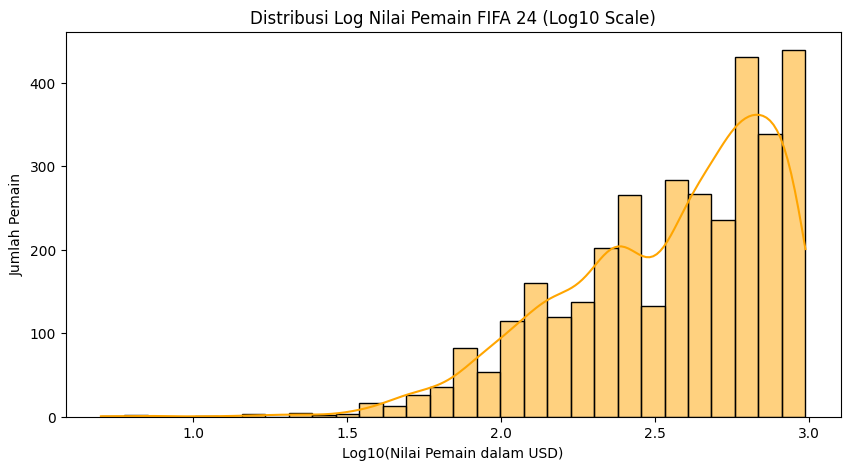

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,5))
sns.histplot(np.log10(df['value_num'] + 1), bins=30, kde=True, color='orange')
plt.title('Distribusi Log Nilai Pemain FIFA 24 (Log10 Scale)')
plt.xlabel('Log10(Nilai Pemain dalam USD)')
plt.ylabel('Jumlah Pemain')
plt.show()


4. TOP 10 Pemain Paling Mahal

/tmp/ipython-input-1238467187.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='value_num', y='player', data=top_players, palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


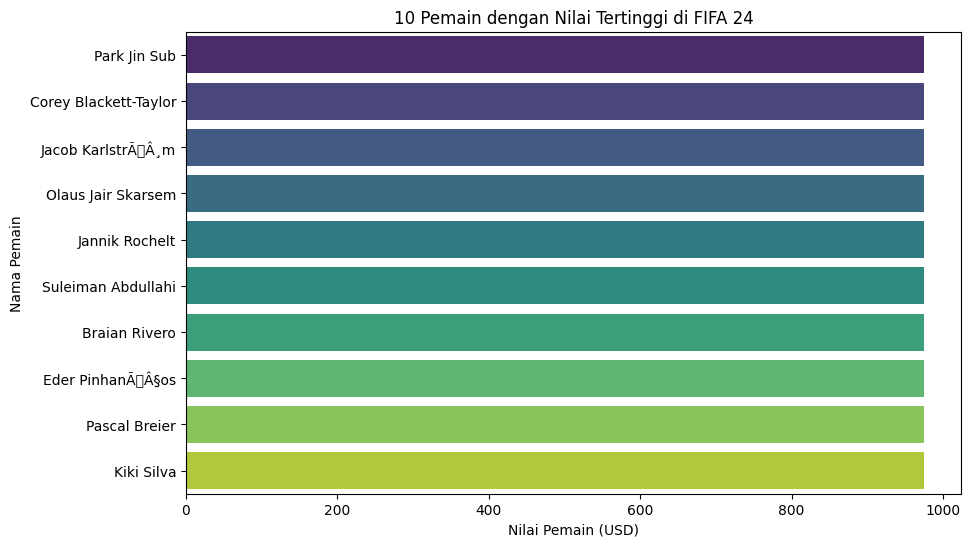

                     player  value_num
1492           Park Jin Sub      975.0
1235  Corey Blackett-Taylor      975.0
1543     Jacob KarlstrÃÂ¸m      975.0
5545     Olaus Jair Skarsem      975.0
1733         Jannik Rochelt      975.0
1749     Suleiman Abdullahi      975.0
1787          Braian Rivero      975.0
1864      Eder PinhanÃÂ§os      975.0
1111          Pascal Breier      975.0
1889             Kiki Silva      975.0


In [42]:
top_players = df[['player', 'value_num']].sort_values(
    by='value_num', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='value_num', y='player', data=top_players, palette='viridis')
plt.title('10 Pemain dengan Nilai Tertinggi di FIFA 24')
plt.xlabel('Nilai Pemain (USD)')
plt.ylabel('Nama Pemain')
plt.show()

print(top_players)


5. MEMBUAT LINE CHART - Rata-rata Nilai Pemain per Negara

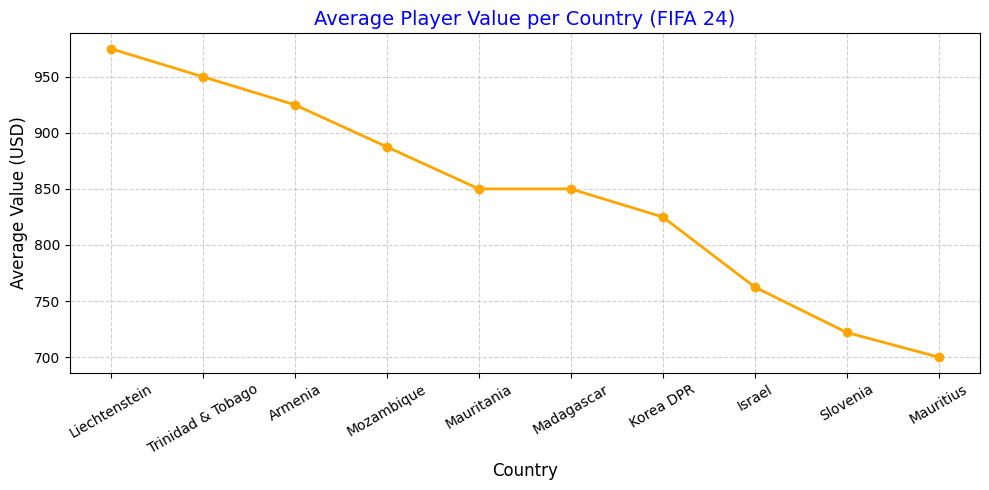

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung rata-rata nilai pemain per negara
avg_value_country = df.groupby('country')['value_num'].mean().sort_values(ascending=False).head(10)

# Buat line chart
plt.figure(figsize=(10,5))
plt.plot(avg_value_country.index, avg_value_country.values, marker='o', color='orange', linewidth=2)

# Judul dan label
plt.title('Average Player Value per Country (FIFA 24)', fontsize=14, color='blue')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Value (USD)', fontsize=12)

# Tampilkan grid ringan biar mirip GMV chart
plt.grid(True, linestyle='--', alpha=0.6)

# Putar label negara biar enak dibaca
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


------ EDA ------------

1. Setup package dan import

In [44]:
# Opsional: install lib jika belum ada
!pip install pandas numpy matplotlib --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


2. Load dataset

In [46]:

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/player_stats_cleaned.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Cek bentuk data

In [47]:
print(df.shape)
display(df.head(10))
display(df.tail(5))


(5679, 41)


,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,73,72,68,30,65,30,50,33,64,49,41,55,86,40,52,43,51,64,54,30,31,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,58,62,70,69,70,64,54,60,63,63,64,87,81,42,67,65,65,54,60,64,68,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,16,27,65,17,20,49,48,14,35,18,46,38,68,41,48,36,60,17,51,14,20,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,69,71,64,48,66,29,70,44,58,53,35,73,82,56,63,57,80,67,32,24,33,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,16,28,50,10,12,38,34,11,23,20,38,28,64,24,31,34,27,13,48,4,6,9,10,16,5,61,59,62,64,64,$300.00
5,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,NaN,13,17,27,70,10,21,55,44,10,25,23,55,44,75,65,54,62,72,21,48,14,16,15,13,13,10,72,78,73,64,74,$2.800.000
6,CÃ©dric Zesiger,Switzerland,194,88,25,BSC Young Boys,52,43,NaN,71,72,63,61,37,68,34,56,43,60,55,55,75,84,33,68,34,74,74,41,33,18,29,22,34,34,10,5,14,12,5,$1.600.000
7,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,NaN,65,70,46,54,27,56,25,46,26,49,45,63,64,78,63,55,45,71,55,39,21,24,26,26,39,25,7,6,12,13,11,$230.00
8,Famara DiÃ©dhiou,Senegal,189,80,30,Granada CF,68,67,NaN,16,22,61,64,72,22,50,64,33,57,42,53,54,86,58,69,60,73,76,74,71,58,53,39,72,63,11,7,10,15,12,$1.400.000
9,Sibiry Keita,Mali,173,67,22,KAS Eupen,65,67,NaN,30,33,40,47,65,29,58,59,60,63,61,81,55,63,80,69,68,60,47,73,53,55,53,31,58,60,8,12,8,5,15,$475.00


,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5674,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,NaN,41,43,63,92,91,55,84,90,80,84,77,89,87,76,91,89,89,69,59,82,92,84,84,69,86,83,11,14,14,9,14,$99.500.000
5675,Sadio Mané,Senegal,174,69,31,FC Bayern München,86,88,NaN,38,42,75,91,90,35,84,84,78,84,71,91,85,72,88,86,93,87,84,83,85,78,77,64,75,75,7,10,10,15,14,$101.000.000
5676,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,NaN,29,32,63,88,86,37,90,93,83,85,81,88,79,52,82,86,93,62,63,79,83,81,88,87,91,86,15,9,9,15,11,$99.500.000
5677,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,NaN,24,32,62,90,93,29,76,94,78,78,70,76,70,75,67,82,77,95,89,93,91,88,79,75,90,85,14,7,11,15,11,$31.000.000
5678,Zlatan Ibrahimovi?,Sweden,195,102,41,Milan,85,75,NaN,24,37,84,77,88,20,83,90,71,77,72,55,34,85,51,61,67,77,82,86,84,85,79,74,80,87,9,13,15,10,12,$10.500.000


4. Info tipe data dan ringkasan

In [48]:
df.info()
display(df.describe(include='number').T)
display(df.describe(include='object').T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          5679 non-null   object 
 1   country         5679 non-null   object 
 2   height          5679 non-null   int64  
 3   weight          5679 non-null   int64  
 4   age             5679 non-null   int64  
 5   club            5679 non-null   object 
 6   ball_control    5679 non-null   int64  
 7   dribbling       5679 non-null   int64  
 8   marking         0 non-null      float64
 9   slide_tackle    5679 non-null   int64  
 10  stand_tackle    5679 non-null   int64  
 11  aggression      5679 non-null   int64  
 12  reactions       5679 non-null   int64  
 13  att_position    5679 non-null   int64  
 14  interceptions   5679 non-null   int64  
 15  vision          5679 non-null   int64  
 16  composure       5679 non-null   int64  
 17  crossing        5679 non-null   i

,count,mean,std,min,25%,50%,75%,max
height,5679.0,181.669484,6.830105,156.0,177.0,182.0,186.0,204.0
weight,5679.0,75.278042,6.997735,54.0,70.0,75.0,80.0,102.0
age,5679.0,26.315196,4.730381,17.0,23.0,26.0,30.0,41.0
ball_control,5679.0,58.916006,16.570252,8.0,55.0,63.0,69.0,94.0
dribbling,5679.0,56.137524,18.769939,5.0,51.0,62.0,68.0,95.0
marking,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slide_tackle,5679.0,46.728825,20.519325,7.0,27.0,54.0,64.0,87.0
stand_tackle,5679.0,48.820743,20.974848,7.0,30.0,57.0,66.0,91.0
aggression,5679.0,56.324881,16.847301,11.0,45.0,60.0,69.0,96.0
reactions,5679.0,61.958619,8.892328,32.0,56.0,62.0,68.0,93.0


,count,unique,top,freq
player,5679,5657,Emmanuel Boateng,3
country,5679,135,England,515
club,5679,689,River Plate,21
value,5679,191,$1.200.000,182


5. Cek missing values

,missing,missing_%
marking,5679,100.0


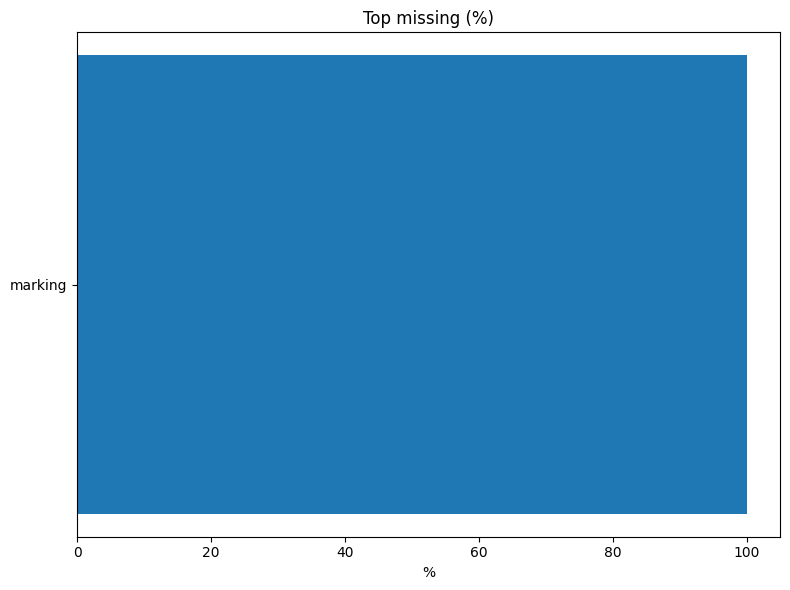

In [49]:
na = df.isna().sum().sort_values(ascending=False)
na_pct = (na/len(df)*100).round(2)
miss = pd.DataFrame({'missing': na, 'missing_%': na_pct})
display(miss[miss['missing']>0].head(30))

# Plot 20 kolom dengan missing terbesar
topn = miss[miss['missing']>0].head(20)
plt.figure(figsize=(8,6))
plt.barh(topn.index[::-1], topn['missing_%'][::-1])
plt.title('Top missing (%)')
plt.xlabel('%')
plt.tight_layout()
plt.show()


6. Cek duplikat dan bersihkan

In [50]:
dups = df.duplicated().sum()
print('Duplikat:', dups)
if dups > 0:
    df = df.drop_duplicates().reset_index(drop=True)


Duplikat: 0


7. Bersihkan kolom nilai uang "value" jadi numerik

In [51]:
# Lihat sampel kolom
df['value'].head(10)

# Normalisasi: buang simbol $, titik pemisah ribuan, spasi
def parse_money(x):
    if pd.isna(x): return np.nan
    s = str(x).replace('$','').replace('.','').replace(',','').strip()
    # Jika ada sufiks seperti 'M' atau 'K', handle di sini. Contoh dataset ini tampak angka penuh.
    try:
        return float(s)
    except:
        return np.nan

if 'value' in df.columns:
    df['value_num'] = df['value'].apply(parse_money)
    print('value_num NA:', df['value_num'].isna().sum())
    display(df[['value','value_num']].head())


value_num NA: 0


,value,value_num
0,$1.400.000,1400000.0
1,$975.00,97500.0
2,$1.100.000,1100000.0
3,$650.00,65000.0
4,$300.00,30000.0


8. Fitur turunan sederhana: BMI dari height dan weight

In [52]:
# Asumsi height (cm), weight (kg)
if {'height','weight'}.issubset(df.columns):
    df['height_m'] = df['height'] / 100
    df['bmi'] = (df['weight'] / (df['height_m']**2)).round(2)
    display(df[['height','weight','bmi']].head())


,height,weight,bmi
0,192,84,22.79
1,181,80,24.42
2,193,84,22.55
3,187,86,24.59
4,191,80,21.93


9. Distribusi fitur numerik utama

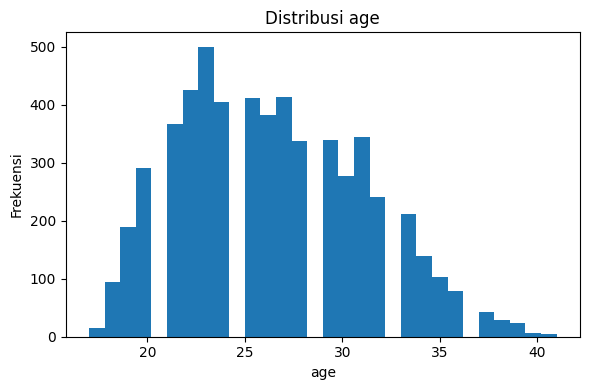

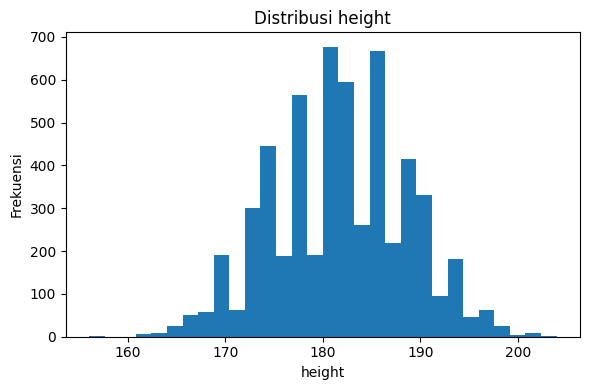

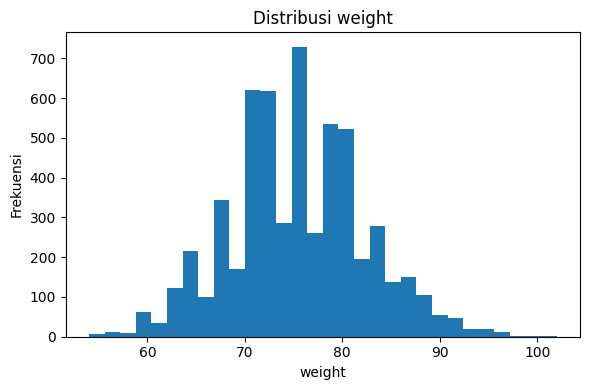

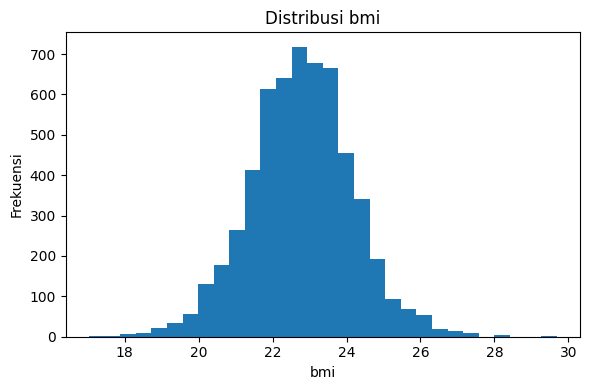

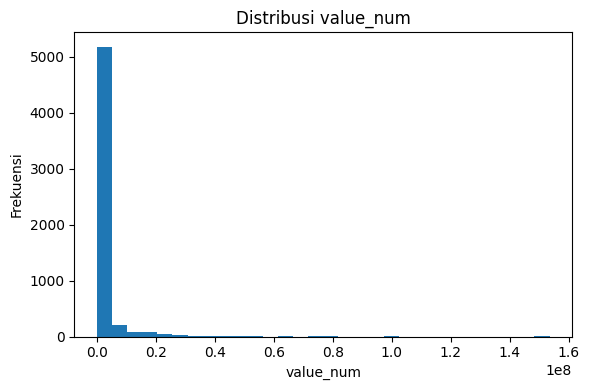

In [53]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

def hist1(col):
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

cols_to_plot = [c for c in ['age','height','weight','bmi','value_num'] if c in numeric_cols]
for c in cols_to_plot:
    hist1(c)


10. Korelasi antar fitur numerik

,height,weight,age,ball_control,dribbling,marking,slide_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value_num,height_m,bmi
height,1.00,0.76,0.08,-0.41,-0.49,NaN,-0.13,-0.12,-0.09,-0.01,-0.44,-0.11,-0.36,-0.19,-0.52,-0.35,-0.32,-0.55,-0.31,0.53,-0.77,-0.45,-0.65,0.04,0.00,-0.17,-0.38,-0.39,-0.47,-0.42,-0.33,-0.35,0.36,0.37,0.37,0.36,0.37,-0.01,1.00,-0.08
weight,0.76,1.00,0.21,-0.33,-0.40,NaN,-0.11,-0.10,-0.02,0.08,-0.35,-0.08,-0.28,-0.09,-0.41,-0.27,-0.25,-0.47,-0.23,0.59,-0.63,-0.39,-0.54,0.11,0.03,-0.08,-0.30,-0.29,-0.38,-0.33,-0.24,-0.26,0.33,0.33,0.33,0.33,0.34,0.01,0.76,0.59
age,0.08,0.21,1.00,0.09,0.04,NaN,0.09,0.10,0.24,0.41,0.11,0.17,0.20,0.36,0.13,0.14,0.19,-0.14,0.13,0.35,-0.05,-0.12,-0.02,0.24,0.16,0.27,0.09,0.17,0.15,0.19,0.16,0.16,0.10,0.09,0.10,0.09,0.09,0.08,0.08,0.23
ball_control,-0.41,-0.33,0.09,1.00,0.95,NaN,0.45,0.48,0.61,0.48,0.88,0.47,0.71,0.76,0.84,0.93,0.81,0.70,0.75,0.13,0.64,0.68,0.72,0.22,0.71,0.61,0.81,0.84,0.84,0.77,0.78,0.80,-0.80,-0.81,-0.81,-0.80,-0.81,0.28,-0.41,0.00
dribbling,-0.49,-0.40,0.04,0.95,1.00,NaN,0.35,0.38,0.52,0.41,0.91,0.37,0.73,0.70,0.87,0.86,0.74,0.76,0.72,0.02,0.69,0.73,0.78,0.15,0.61,0.61,0.85,0.86,0.86,0.78,0.79,0.82,-0.78,-0.78,-0.78,-0.78,-0.78,0.25,-0.49,-0.01
marking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slide_tackle,-0.13,-0.11,0.09,0.45,0.35,NaN,1.00,0.98,0.73,0.24,0.20,0.95,0.14,0.36,0.45,0.56,0.61,0.23,0.59,0.28,0.24,0.25,0.19,0.31,0.54,-0.02,0.01,0.17,0.29,0.25,0.11,0.07,-0.55,-0.55,-0.55,-0.55,-0.55,0.07,-0.13,-0.00
stand_tackle,-0.12,-0.10,0.10,0.48,0.38,NaN,0.98,1.00,0.75,0.27,0.23,0.96,0.18,0.40,0.47,0.59,0.63,0.25,0.61,0.30,0.25,0.26,0.21,0.31,0.57,0.02,0.05,0.21,0.33,0.29,0.14,0.11,-0.57,-0.57,-0.57,-0.57,-0.57,0.09,-0.12,0.00
aggression,-0.09,-0.02,0.24,0.61,0.52,NaN,0.73,0.75,1.00,0.43,0.45,0.75,0.33,0.57,0.51,0.67,0.64,0.32,0.68,0.47,0.28,0.35,0.30,0.44,0.73,0.30,0.32,0.43,0.45,0.42,0.39,0.37,-0.62,-0.62,-0.62,-0.61,-0.61,0.18,-0.09,0.09
reactions,-0.01,0.08,0.41,0.48,0.41,NaN,0.24,0.27,0.43,1.00,0.41,0.33,0.54,0.70,0.39,0.54,0.51,0.21,0.41,0.34,0.19,0.22,0.28,0.30,0.38,0.52,0.37,0.43,0.43,0.39,0.38,0.41,-0.09,-0.10,-0.10,-0.09,-0.09,0.50,-0.01,0.13


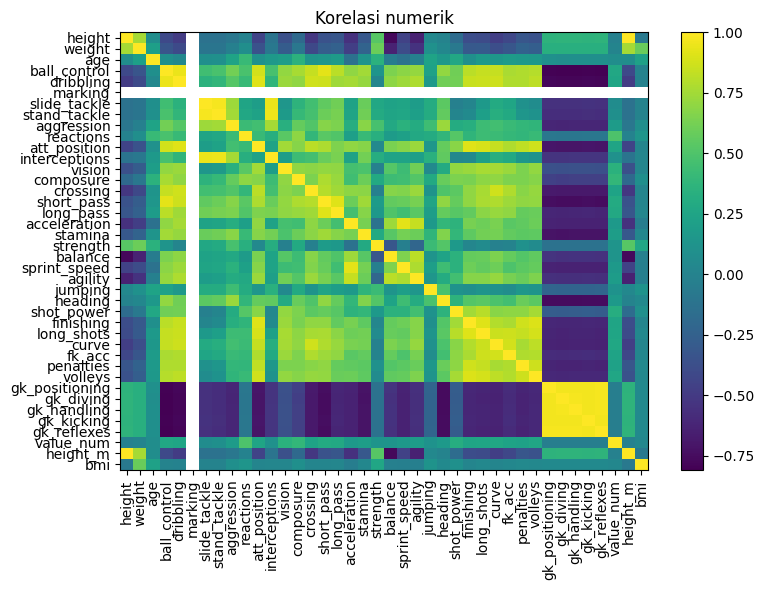

In [54]:
num = df.select_dtypes(include='number')
corr = num.corr(numeric_only=True)
display(corr.round(2))

# Heatmap sederhana
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.title('Korelasi numerik')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout()
plt.show()


11. Top korelasi dengan value_num

In [55]:
if 'value_num' in df.columns:
    tgt_corr = corr['value_num'].drop('value_num').sort_values(ascending=False)
    display(tgt_corr.head(10))
    display(tgt_corr.tail(10))


,value_num
reactions,0.498378
composure,0.390007
vision,0.344870
shot_power,0.319623
short_pass,0.299294
long_pass,0.281825
ball_control,0.276531
curve,0.272077
volleys,0.264898
long_shots,0.255717


,value_num
bmi,0.027335
weight,0.008124
height_m,-0.014166
height,-0.014166
gk_positioning,-0.031393
gk_reflexes,-0.033372
gk_kicking,-0.034484
gk_handling,-0.034646
gk_diving,-0.034684
marking,NaN


12. Analisis kategori: negara dan klub

,count
country,
England,515
Germany,389
Spain,356
France,309
Argentina,302
Brazil,223
Italy,186
Netherlands,146
Sweden,124


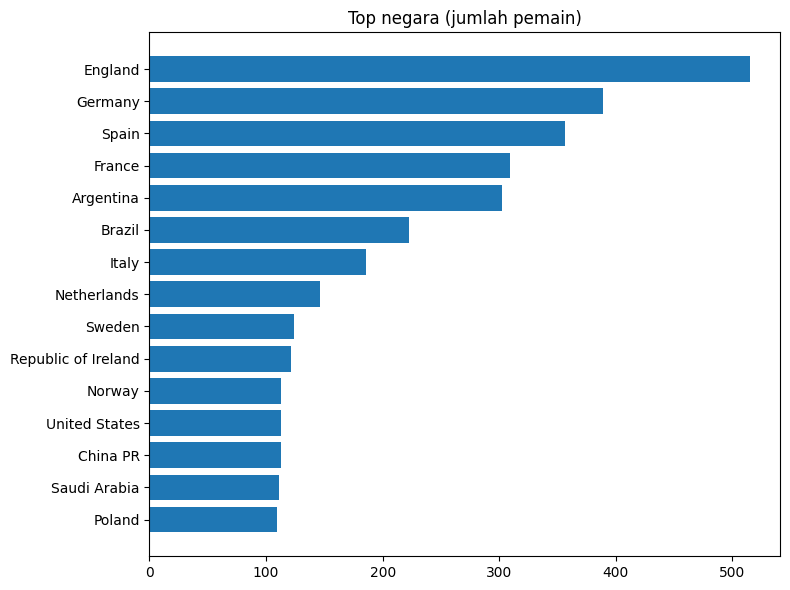

,count
club,
River Plate,21
Liverpool,17
LanÃºs,17
Girona FC,16
Barnsley,16
Arsenal,16
CÃ¡diz CF,15
Valencia CF,15
Holstein Kiel,15


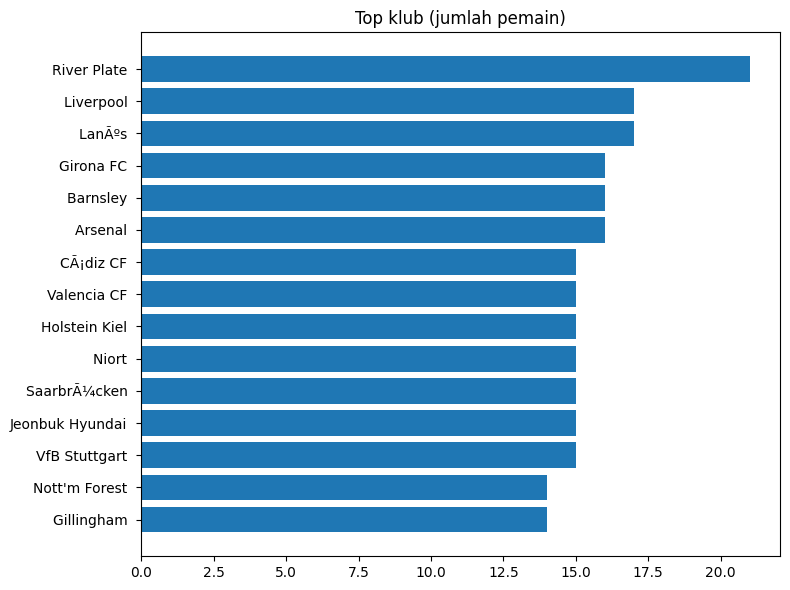

In [56]:
if 'country' in df.columns:
    top_country = df['country'].value_counts().head(15)
    display(top_country)

    plt.figure(figsize=(8,6))
    plt.barh(top_country.index[::-1], top_country.values[::-1])
    plt.title('Top negara (jumlah pemain)')
    plt.tight_layout()
    plt.show()

if 'club' in df.columns:
    top_club = df['club'].value_counts().head(15)
    display(top_club)

    plt.figure(figsize=(8,6))
    plt.barh(top_club.index[::-1], top_club.values[::-1])
    plt.title('Top klub (jumlah pemain)')
    plt.tight_layout()
    plt.show()


13. Deteksi outlier cepat pakai IQR

In [57]:
def iqr_outliers(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    return (s < low) | (s > high)

check_cols = [c for c in ['age','height','weight','bmi','value_num'] if c in df.columns]
for c in check_cols:
    out_n = iqr_outliers(df[c].dropna()).sum()
    print(f'Outlier {c}:', out_n)


Outlier age: 5
Outlier height: 31
Outlier weight: 24
Outlier bmi: 100
Outlier value_num: 630


14. Contoh analisis skill teknis dasar

,count,mean,std,min,25%,50%,75%,max
stand_tackle,5679.0,48.820743,20.974848,7.0,30.0,57.0,66.0,91.0
slide_tackle,5679.0,46.728825,20.519325,7.0,27.0,54.0,64.0,87.0
interceptions,5679.0,47.388096,20.450908,3.0,28.0,54.0,64.0,89.0
finishing,5679.0,46.365557,19.821372,4.0,31.0,51.0,62.0,94.0
att_position,5679.0,50.735869,19.776480,3.0,40.0,56.0,65.0,93.0
long_shots,5679.0,47.173446,19.462666,5.0,33.0,51.0,62.0,91.0
dribbling,5679.0,56.137524,18.769939,5.0,51.0,62.0,68.0,95.0
curve,5679.0,48.110583,18.084352,7.0,36.0,50.0,62.0,93.0
gk_reflexes,5679.0,16.562247,17.929668,3.0,8.0,11.0,14.0,89.0
volleys,5679.0,42.939250,17.913396,4.0,30.0,44.0,57.0,90.0


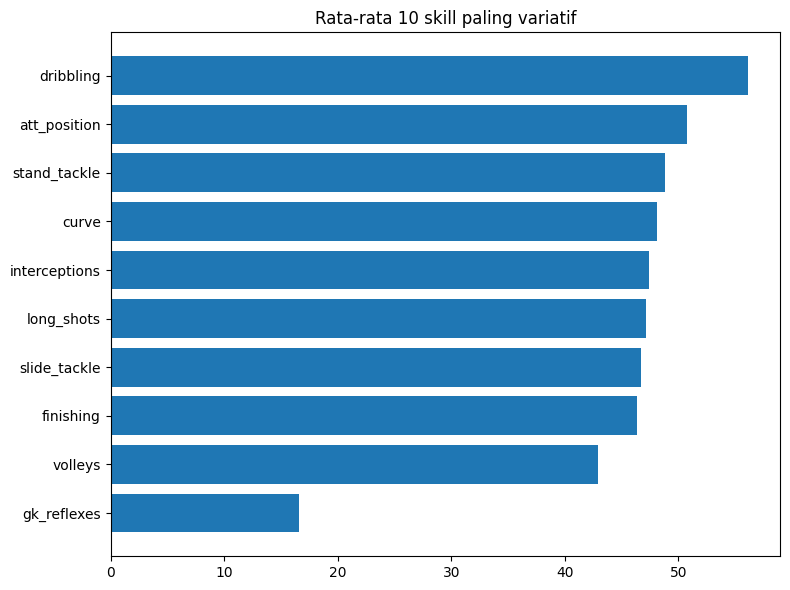

In [58]:
skill_cols = [c for c in df.columns if c not in ['player','country','club','value','value_num','height','weight','age','height_m','bmi']]
# Ambil 10 skill numerik paling variatif
skill_num = df[skill_cols].select_dtypes(include='number')
var_top = skill_num.var().sort_values(ascending=False).head(10).index.tolist()
display(skill_num[var_top].describe().T)

# Plot rata-rata 10 skill variatif
means = skill_num[var_top].mean().sort_values(ascending=True)
plt.figure(figsize=(8,6))
plt.barh(means.index, means.values)
plt.title('Rata-rata 10 skill paling variatif')
plt.tight_layout()
plt.show()


15. Simpan versi bersih

In [59]:
save_cols = df.columns  # atau pilih subset
df.to_csv('player_stats_cleaned_eda_ready.csv', index=False)
print('File disimpan: player_stats_cleaned_eda_ready.csv')


File disimpan: player_stats_cleaned_eda_ready.csv
